In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
sns.set()

In [69]:
lol = titanic_training[(titanic_training["Sex"]=='male') & (titanic_training["Pclass"]==1) & (titanic_training["Age"]==50.0)]
sum(lol["Survived"])/len(lol)

0.3333333333333333

In [70]:
titanic_training[(titanic_training["Sex"]=='male') & (titanic_training["Age"]==50.0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.900,E44,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.050,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.425,C86,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.650,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.000,NaN,S


In [72]:
data = titanic_training[~titanic_training["Age"].isna()][["Survived", "Pclass", "Age", "Sex"]]

In [73]:
data.describe()

,Survived,Pclass,Age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [37]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

## The Titanic Dataset

1. Survived: 0 (no) or 1(yes)
2. Pclass: ticket class, 1 (upper), 2 (middle) or 3 (lower)
3. Sex: 0 (male) or 1 (female)
4. Age: float, ranging from 0.4 to 80, contains NaN

In [38]:
titanic_training = pd.read_csv('train.csv')
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


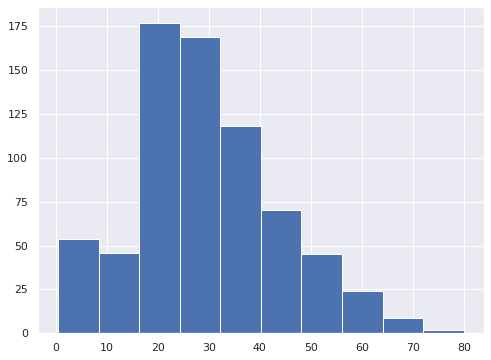

In [40]:
titanic_training[~titanic_training["Age"].isna()]["Age"].hist()

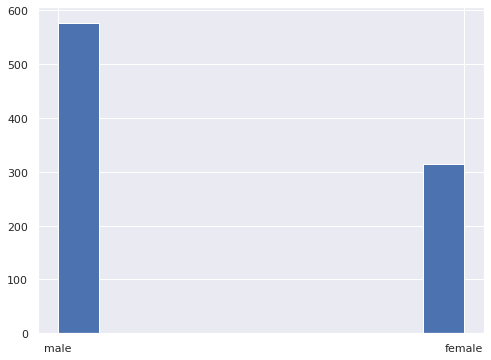

In [41]:
titanic_training[~titanic_training["Sex"].isna()]["Sex"].hist()

In [42]:
sum(titanic_training["Sex"] == "male")/sum(titanic_training["Sex"].isin(["female", "male"]))

0.6475869809203143

## Deterministic Counterfactuals

### Naive Approach - Matching

In [43]:
# Jack, who is A = 22, S = Male, C = 3rd class
titanic_training.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [44]:
# If we assume Age, Sex, Class are the only relevant variables then we can compute the counterfactual by matching
matches = titanic_training[(titanic_training["Sex"]=='female') & (titanic_training["Pclass"]==3) & (titanic_training["Age"]==22.0)]

In [45]:
matches

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


In [46]:
survived = dict(matches["Survived"].value_counts())
survived[1]/(survived[0]+survived[1])

0.6666666666666666

In [47]:
other_jacks = titanic_training[(titanic_training["Sex"]=='male') & (titanic_training["Pclass"]==3) & (titanic_training["Age"]==22.0)]

In [48]:
survived = dict(other_jacks["Survived"].value_counts())
survived[1]/(survived[0]+survived[1])

0.07142857142857142

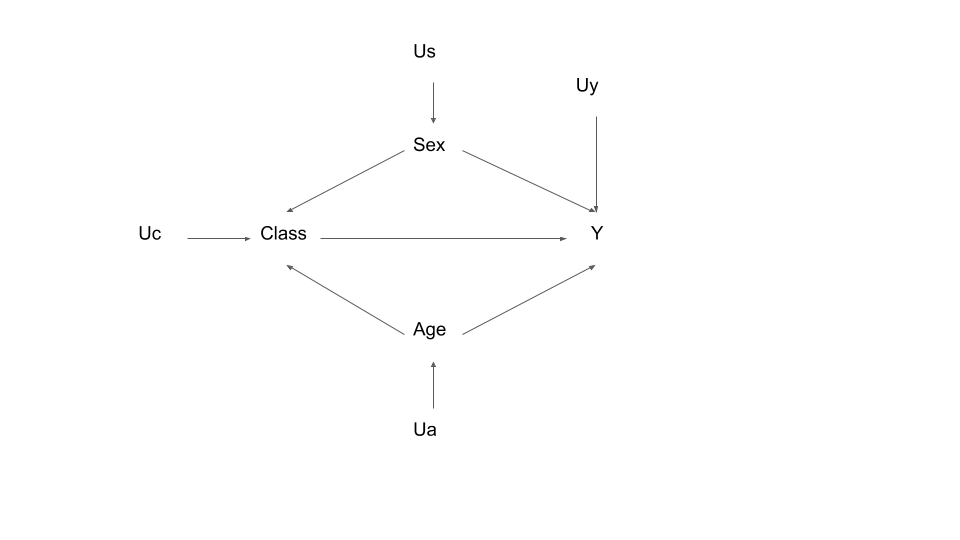

In [49]:
# so clearly being female helps survival
# so far we've completely neglected to model the noise parameters or dynamics of the system
# we notice that modelling of the noise is necessary since the probability isn't 100% Jackley would survive
# also as we will see, matching the class and age directly is wrong, because intervening on sex changes class
Image(filename='graph1.png')

### Modelling the Noise and Dynamics

In [50]:
from sklearn.linear_model import LinearRegression

def print_formula(feature_names, target_name, model):
    lhs = target_name
    rhs = '{:.4f} '.format(model.intercept_)
    for name, coef in zip(feature_names, model.coef_):
        sign = '+' if coef > 0 else '-'
        rhs += '{} {:.4f} {} '.format(sign, abs(coef), name)
    print(lhs + ' = ' + rhs)

def fit_linear_model(feature_names, target_name, fit_intercept):
    df = titanic_training.copy()
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    # mean imputation on Age
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    lm = LinearRegression(fit_intercept=fit_intercept)
    lm.fit(df[feature_names], df[target_name])
    print_formula(feature_names, target_name, lm)

#### Step 1: Modelling

In [51]:
# Fit S = U_S (they're free for deterministic cnfacts)
# Fit A = U_A
# Note: you can treat U_Y as the residuals from the fit Y_actual - Y_predict
# Same with U_C
# only valid if the error from measurement e_Y, e_C is 0, which we assume for simplicity

In [52]:
# Fit Y(A, S, C) + U_Y + e_Y
fit_linear_model(feature_names=['Sex', 'Pclass', 'Age'], target_name='Survived', fit_intercept=True)

Survived = 0.7846 + 0.4989 Sex - 0.1852 Pclass - 0.0050 Age 


In [53]:
# Fit C(A, S) + U_C + e_C
fit_linear_model(feature_names=['Sex', 'Age'], target_name='Pclass', fit_intercept=True)

Pclass = 3.0665 - 0.2815 Sex - 0.0222 Age 


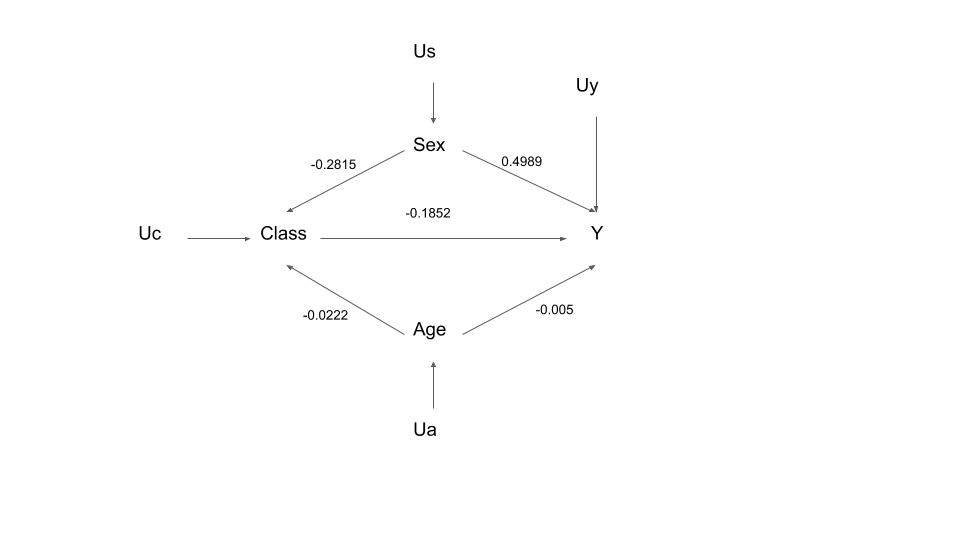

In [54]:
Image(filename='graph2.png')

#### Step 2: Abduction 

In [55]:
# Jack who is A = 22, S = Male, C = 3rd class
# Pclass = 3.0665 - 0.2815 Sex - 0.0222 Age + U_C
Uc = 0.4219

In [56]:
# Jack who is A = 22, S = Male, C = 3rd class
# Survived = 0.7846 + 0.4989 Sex - 0.1852 Pclass - 0.0050 Age +_U_Y
Uy = -0.119

In [57]:
# This is the tricky part, there's modelling error so Uy and Uc are unreliable

#### Step 3: Intervention

In [58]:
S = 1

#### Step 4: Prediction

In [59]:
Pclass = 3.0665 - 0.2815*1 - 0.0222 * 22 + 0.4219

In [60]:
Survived = 0.7846 + 0.4989*1 - 0.1852*Pclass - 0.005*22 - 0.119

In [61]:
Survived

0.5510338

In [62]:
# the effect is not as strong as before
# maybe the linearity assumption is bad?
# how do we deal with categorical variables like Pclass taking on continuous values?
Pclass

2.7185

In [63]:
0.7846 + 0.4989*0 - 0.1852*3 - 0.005*22 - 0.119

-1.3877787807814457e-17

## Solution in terms of Intervention for Linear Systems

In [64]:
# E[Y|Z = e] + τ(x − E[X|Z = e])
# τ = E[Y|do(x + 1)] − E[Y|do(x)]

In [65]:
# τ is the total causal effect which is 0.50 Sex from the linear intervention modelling
# E[Sex=1|Sex=0] = 1
# E[Y|Jack] = 0.0714
0.0714 + 0.50*1

0.5714

In [ ]:
# This is a lot closer to our estimate of 0.551 than the direct substitution which makes sense since we're using
# linear models in both cases

### Linear Model with Uncertainty

In [ ]:
# we can explicitly model our population exogenous variables instead of mixing it in with the observation/empirical noise

In [1]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir="./logs")

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn

import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
pyro.enable_validation(True)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
def check_dim(x):
    if len(x.shape) == 1:
        return x.unsqueeze(1)
    return x

class DecoderC(nn.Module):
    def __init__(self, U_c_dim, num_classes):
        super(DecoderC, self).__init__()
        self.fc1 = nn.Linear(U_c_dim + 2, num_classes)
        self.softmax = nn.Softmax()

    def forward(self, U_c, A, S):

        A, S = [check_dim(x) for x in [A, S]]
        
        logits = self.fc1(torch.cat([U_c, A, S], dim=1))
        probs = self.softmax(logits)
        return probs
    
class DecoderY(nn.Module):
    def __init__(self, U_y_dim, num_classes):
        super(DecoderY, self).__init__()
        self.fc1 = nn.Linear(U_y_dim + 3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, U_y, A, S, C):

        A, S, C = [check_dim(x) for x in [A, S, C]]
        
        logits = self.fc1(torch.cat([U_y, A, S, C], dim=1))
        probs = self.sigmoid(logits)
        return probs

class EncoderC(nn.Module):
    def __init__(self, U_c_dim, num_classes):
        super(EncoderC, self).__init__()
        self.fc1 = nn.Linear(3, U_c_dim)
        self.fc2 = nn.Linear(3, U_c_dim)

    def forward(self, CAS):

        mean_c = self.fc1(CAS)
        std_c = torch.exp(self.fc2(CAS))
        return mean_c, std_c
    
class EncoderY(nn.Module):
    def __init__(self, U_y_dim, num_classes):
        super(EncoderY, self).__init__()
        self.fc1 = nn.Linear(4, U_y_dim)
        self.fc2 = nn.Linear(4, U_y_dim)

    def forward(self, YCAS):

        mean_y = self.fc1(YCAS)
        std_y = torch.exp(self.fc2(YCAS))
        return mean_y, std_y
    
def to_one_hot(idxs, num_classes):
    
    idxs = idxs.reshape(-1, 1)
    return (idxs == torch.arange(num_classes).reshape(1, num_classes).to(device)).float()

def one_hot_to_idx(one_hot):
    return one_hot.nonzero()[:, -1].float()

In [3]:
class LinearVAE(nn.Module):

    def __init__(self, U_c_dim=1, U_y_dim=1, num_classes=3):
        super(LinearVAE, self).__init__()
        # create the encoder and decoder networks
        self.encoder_c = EncoderC(U_c_dim, num_classes)
        self.encoder_y = EncoderY(U_y_dim, num_classes)
        self.decoder_c = DecoderC(U_c_dim, num_classes)
        self.decoder_y = DecoderY(U_y_dim, num_classes)

        self.U_c_dim = U_c_dim
        self.U_y_dim = U_y_dim
        self.num_classes = num_classes

    # define the model p(x|z)p(z)
    def model(self, x):
        pyro.module("decoder_c", self.decoder_c)
        pyro.module("decoder_y", self.decoder_y)

        with pyro.plate("data", x.shape[0]):
            # x is (Outcome, Class, Age, Sex)
            
            # prior on U_c
            mean_c = x.new_zeros(torch.Size((x.shape[0], self.U_c_dim)))
            std_c = x.new_ones(torch.Size((x.shape[0], self.U_c_dim)))
            U_c = pyro.sample("U_c", dist.Normal(mean_c, std_c).to_event(1))
            
            # prior on U_y
            mean_y = x.new_zeros(torch.Size((x.shape[0], self.U_y_dim)))
            std_y = x.new_ones(torch.Size((x.shape[0], self.U_y_dim)))
            U_y = pyro.sample("U_y", dist.Normal(mean_y, std_y).to_event(1))
            
            # prior on Age
            mean_a = 29.7*x.new_ones(torch.Size((x.shape[0], 1)))
            std_a = 14.5*x.new_ones(torch.Size((x.shape[0], 1)))
            A = pyro.sample("Age", dist.Normal(mean_a, std_a).to_event(1))
            
            # prior on Sex
            prob_s = 0.6476*x.new_ones(torch.Size((x.shape[0], 1)))
            S = pyro.sample("Sex", dist.Bernoulli(prob_s).to_event(1))
            
            # decode the latent code z
            C_probs = self.decoder_c(U_c, A, S)
            C = pyro.sample("Class", dist.Multinomial(probs=C_probs).to_event(1), obs=to_one_hot(x[:, 1], self.num_classes))
            C = one_hot_to_idx(C)
            
            # score against actual outcome
            Y = self.decoder_y(U_y, A, S, C)
            pyro.sample("Outcome", dist.Bernoulli(Y).to_event(1), obs=x[:, 0].reshape(-1, 1))
            
    # define the guide (i.e. variational distribution) q(z|x)
    def guide(self, x):
        pyro.module("encoder_c", self.encoder_c)
        pyro.module("encoder_y", self.encoder_y)
                        
        with pyro.plate("data", x.shape[0]):
            # x is (Outcome, Class, Age, Sex)
                        
            # posterior on U_c            
            mean_c, std_c = self.encoder_c(x[:, 1:])
            pyro.sample("U_c", dist.Normal(mean_c, std_c).to_event(1))
                        
            # posterior on U_y           
            mean_y, std_y = self.encoder_y(x)
            pyro.sample("U_y", dist.Normal(mean_y, std_y).to_event(1))

In [4]:
class TitanicDataset(Dataset):

    def __init__(self, data):

        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [14]:
def train(train_loader, svi):

    epoch_loss = 0

    for batch in tqdm(train_loader):
        batch = batch.float().to(device)
        epoch_loss += svi.step(batch)

    return epoch_loss/len(train_loader.dataset)

def evaluate(test_loader, svi, vae, epoch):

    test_loss = 0.

    for i, batch in enumerate(tqdm(test_loader)):
        batch = batch.float().to(device)
        test_loss += svi.evaluate_loss(batch)

        if i == 0:
            subdata = batch[0].unsqueeze(0)
            mean_c, _ = vae.encoder_c(subdata[:, 1:])
            mean_y, _ = vae.encoder_y(subdata)
            C_probs = vae.decoder_c(mean_c, subdata[:, 2], subdata[:, 3])
            Y = vae.decoder_y(mean_y, subdata[:, 2], subdata[:, 3], subdata[:, 1])
            print(subdata, mean_c, mean_y, C_probs, Y)

    return test_loss / len(test_loader.dataset)

In [10]:
data = titanic_training[~titanic_training["Age"].isna()][["Survived", "Pclass", "Age", "Sex"]]
data["Sex"] = data["Sex"].map({'male': 1, 'female': 0})
data["Pclass"] = data["Pclass"] - 1
data = data.values

np.random.shuffle(data)
train_data, test_data = data[:int(0.7*len(data)),:], data[int(0.7*len(data)):,:]
train_dataset, test_dataset = [TitanicDataset(x) for x in [train_data, test_data]]

train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=256, shuffle=False)

In [15]:
num_epochs = 200
pyro.clear_param_store()
train_elbo = []
test_elbo = []

vae = LinearVAE().to(device)
optimizer = Adam({"lr": 1.0e-3})
svi = SVI(vae.model, vae.guide, optimizer, loss=Trace_ELBO())

for epoch in range(num_epochs):

    total_epoch_loss_train = train(train_loader, svi)
    train_elbo.append(-total_epoch_loss_train)
    writer.add_scalar('ELBO/train', -total_epoch_loss_train, epoch)
    print("[epoch %03d]  average training loss: %.4f" % (epoch, total_epoch_loss_train))

    if epoch % 4 == 0:
        # report test diagnostics
        total_epoch_loss_test = evaluate(test_loader, svi, vae, epoch)
        test_elbo.append(-total_epoch_loss_test)
        writer.add_scalar('ELBO/test', -total_epoch_loss_test, epoch)
        print("[epoch %03d] average test loss: %.4f" % (epoch, total_epoch_loss_test))

 50%|█████     | 1/2 [00:00<00:00,  4.98it/s]


ValueError: The parameter scale has invalid values
         Trace Shapes:        
          Param Sites:        
encoder_c$$$fc1.weight   1 3  
  encoder_c$$$fc1.bias     1  
encoder_c$$$fc2.weight   1 3  
  encoder_c$$$fc2.bias     1  
encoder_y$$$fc1.weight   1 4  
  encoder_y$$$fc1.bias     1  
encoder_y$$$fc2.weight   1 4  
  encoder_y$$$fc2.bias     1  
         Sample Sites:        
             data dist     |  
                 value 243 |  
              U_c dist 243 | 1
                 value 243 | 1